# Exploring KNMI Climate Explorer using filters

![image](https://i2.wp.com/i53.tinypic.com/245ftih.jpg)


In [11]:
#Dataset from KNMI (https://climexp.knmi.nl/getstations.cgi)
# Ocean Heat Content

import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import signal

q=Dataset('idai.nc','r',format='NETCDF4')  
q.variables 

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float32 time(time)
                  units: years since  800-07-01
                  standard_name: time
                  long_name: time
                  axis: T
                  calendar: gregorian
              unlimited dimensions: 
              current shape = (1204,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('DAI', <class 'netCDF4._netCDF4.Variable'>
              float32 DAI(time)
                  long_name: area with PDSI&lt;-1
                  units: %
                  _FillValue: 3e+33
              unlimited dimensions: 
              current shape = (1204,)
              filling on)])

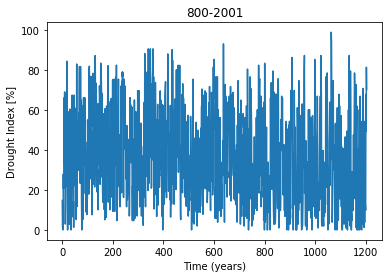

In [12]:
t = np.array(q.variables['time'])   #time
R = np.array(q.variables['DAI'])    #Heat content
R[R==3e+33]=np.nan                  #Remove nans
t = t[~np.isnan(R)]
R = R[~np.isnan(R)]
#R.shape
#print(R)
plt.plot(t,R)
plt.xlabel('Time (years)');plt.ylabel('Drought Index [%]');
plt.title('800-2001');

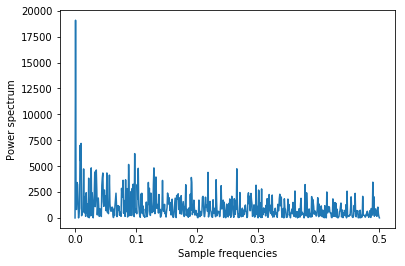

In [3]:
#Calculate the power spectrum of the time series

f, Pxx = signal.periodogram(R) # Daily periodicity
plt.plot(f,Pxx)
plt.ylabel('Power spectrum');plt.xlabel('Sample frequencies');

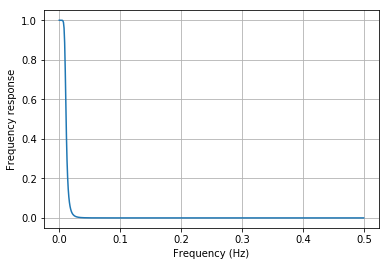

In [4]:
#Identify the dominant frequency and create a low pass filter to remove the seasonality

from scipy.signal import butter, lfilter
from scipy.signal import freqz
import matplotlib.pyplot as plt
nyq=0.5
f=0.01
b, a = butter(5,f/nyq, btype='low')      # low-pass filter, f/nyq to normalize the frequency with Nq;
# b and a are numerator and denominator of IIR filter (Infinite impulse response) as opposed to FIR
w, h = freqz(b, a)
# h is the frequency response and w is the normalized frequencies at which h is calculated

plt.plot((nyq / (1*np.pi)) * w, abs(h))

# abs(h) because h is complex, w is converted back into the sampling frequency to obtain the following plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency response')
plt.grid(True)

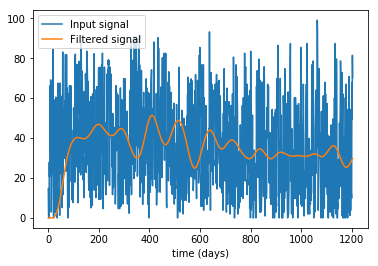

In [5]:
plt.figure()
plt.plot(t,R, label='Input signal')
y = lfilter(b, a, R)
#lfilter is a causal approach to filter signal only in forward direction, so there is a lag in phase with the original signal
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (days)')
plt.legend(loc='upper left')
plt.show()

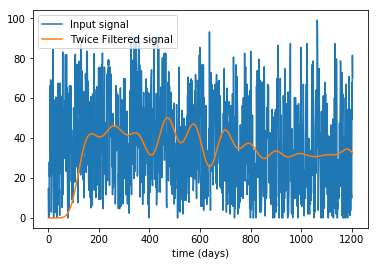

In [6]:
plt.figure()
plt.plot(t,R, label='Input signal')
y1 = lfilter(b, a, y)
plt.plot(t, y1, label='Twice Filtered signal')
plt.xlabel('time (days)')
plt.legend(loc='upper left')
plt.show()

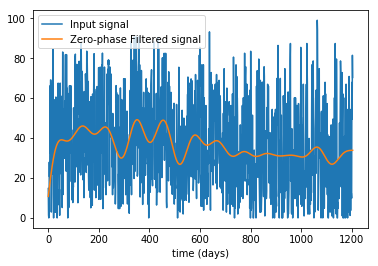

In [7]:
from scipy import signal
plt.figure()
plt.plot(t,R, label='Input signal')
y2 = signal.filtfilt(b, a, R)
#filtfilt is a non-causal approach to filter a signal forward and backward giving a zero-phase filtering 
#i.e. doesn't shift the signal in forward or backward direction as it filters
plt.plot(t, y2, label='Zero-phase Filtered signal')
plt.xlabel('time (days)')
plt.legend(loc='upper left')
plt.show()

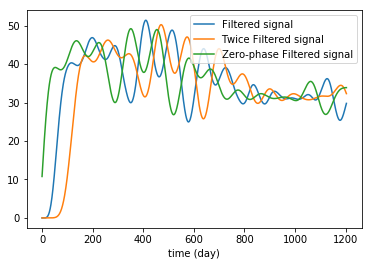

In [8]:
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (day)')
plt.legend(loc='upper left')
plt.plot(t, y1, label='Twice Filtered signal')
plt.xlabel('time (day)')
plt.legend(loc='upper left')
plt.plot(t, y2, label='Zero-phase Filtered signal')
plt.xlabel('time (day)')
plt.legend(loc='upper right')
plt.show()